<a href="https://colab.research.google.com/github/fsrt16/Coronavirus---a-pandemic-rehdreseal-/blob/master/CoronaThreat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Importing required packages.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

In [0]:
import warnings
warnings.filterwarnings("ignore")

In [47]:
train = pd.read_csv('/content/Train_dataset - Train_dataset.csv')
train.head()

,people_ID,Region,Gender,Designation,Name,Married,Children,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,Age,Coma score,Pulmonary score,cardiological pressure,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob
0,1,Bhubaneshwar,Female,Mrs,mansi,YES,1.0,Farmer,Public,2,0,Hypertension,68,8,<400,Normal,441.0,154.0,93.0,233.0,82.0,58.0,27,7,3600000.0,1300000,2.0,49.135010
1,2,Bhubaneshwar,Female,Mrs,riya masi,YES,2.0,Farmer,Walk,2,0,Diabetes,64,15,<100,Stage-02,NaN,121.0,56.0,328.0,89.0,68.0,5,6,1600000.0,400000,1.0,51.147880
2,3,Bhubaneshwar,Female,Mrs,sunita,NO,1.0,Cleaner,Public,2,0,None,19,13,<300,Elevated,416.0,124.0,137.0,213.0,77.0,43.0,40,6,3400000.0,900000,1.0,73.224000
3,4,Bhubaneshwar,Female,Mrs,anjali @ babli,YES,1.0,Driver,Car,2,0,Coronary Heart Disease,33,9,<200,Stage-01,410.0,98.0,167.0,275.0,64.0,60.0,27,7,700000.0,2300000,1.0,48.779225
4,5,Bhubaneshwar,Female,Mrs,champa karketta,NO,2.0,Manufacturing,Car,2,0,Diabetes,23,7,<400,Normal,390.0,21.0,153.0,331.0,71.0,64.0,32,7,3200000.0,1100000,1.0,87.868800


In [48]:
test = pd.read_csv('/content/Test_dataset.xlsx - Test_dataset.csv')
test.head()

,people_ID,Region,Gender,Designation,Name,Married,Children,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,Age,Coma score,Pulmonary score,cardiological pressure,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month
0,5942,Delhi,Female,Mrs,smt rekha prajapat,YES,2,Driver,Public,4,1,Diabetes,52,3,<200,Stage-01,388,153,196,240,85,53,17,3,3900000,1300000,1
1,18664,Delhi,Male,Mr,nirmal,YES,2,Legal,Walk,4,1,Diabetes,53,11,<200,Stage-01,409,95,138,241,81,61,2,5,1800000,1300000,1
2,5603,Delhi,Female,Mrs,pinky,YES,2,Sales,Car,4,1,Diabetes,35,9,<100,Stage-02,440,40,166,236,88,47,24,3,5000000,2000000,2
3,5649,Delhi,Female,Mrs,pooja @aafrin,YES,2,Sales,Car,4,1,None,31,12,<300,Elevated,206,78,83,211,87,52,13,6,3100000,600000,2
4,5099,Delhi,Female,Mrs,anjali,YES,2,Business,Car,4,1,Diabetes,51,6,<200,Stage-01,229,109,207,312,94,68,39,5,2300000,1500000,1


# **Data Briefing**

In [49]:
train.columns

Index(['people_ID', 'Region', 'Gender', 'Designation', 'Name', 'Married',
       'Children', 'Occupation', 'Mode_transport', 'cases/1M', 'Deaths/1M',
       'comorbidity', 'Age', 'Coma score', 'Pulmonary score',
       'cardiological pressure', 'Diuresis', 'Platelets', 'HBB', 'd-dimer',
       'Heart rate', 'HDL cholesterol', 'Charlson Index', 'Blood Glucose',
       'Insurance', 'salary', 'FT/month', 'Infect_Prob'],
      dtype='object')

In [50]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10714 entries, 0 to 10713
Data columns (total 28 columns):
people_ID                 10714 non-null int64
Region                    10714 non-null object
Gender                    10714 non-null object
Designation               10714 non-null object
Name                      10694 non-null object
Married                   10714 non-null object
Children                  10403 non-null float64
Occupation                9967 non-null object
Mode_transport            10711 non-null object
cases/1M                  10714 non-null int64
Deaths/1M                 10714 non-null int64
comorbidity               10488 non-null object
Age                       10714 non-null int64
Coma score                10714 non-null int64
Pulmonary score           10714 non-null object
cardiological pressure    10617 non-null object
Diuresis                  9998 non-null float64
Platelets                 9790 non-null float64
HBB                       10698 

# **Preprocessing** 

*identifying Numeric or float variables*

In [51]:
numeric_variables = list(train.select_dtypes(include=['int64','float']).columns.values)
train[numeric_variables]=train[numeric_variables].apply(lambda x: x.fillna(x.mean()),axis=0)
numeric_variables

['people_ID',
 'Children',
 'cases/1M',
 'Deaths/1M',
 'Age',
 'Coma score',
 'Diuresis',
 'Platelets',
 'HBB',
 'd-dimer',
 'Heart rate',
 'HDL cholesterol',
 'Charlson Index',
 'Blood Glucose',
 'Insurance',
 'salary',
 'FT/month',
 'Infect_Prob']

*identifying string or object variables*

In [257]:
categorical_variables = list(train.select_dtypes(exclude=['int64','float','bool']).columns.values)
categorical_variables

['Region',
 'Gender',
 'Designation',
 'Name',
 'Married',
 'Occupation',
 'Mode_transport',
 'comorbidity',
 'Pulmonary score',
 'cardiological pressure']

**Dealing With Missing Values**


### 1.   **For Numeric Values we can take** 

*   Mean : regular meaning of "average"
*   Median : middle value in sorted order



---



### 2.   **For Numeric Values we can take**

*   ffill : forward value fill , here we can replace the nan values by the first non nan values. We can also set limit to this action in order to percieve redundancy and consistency of data stream
*   dfill : backward value fill , here we can replace the nan values by the last non nan values. We can also set limit to this action in order to percieve redundancy and consistency of data stream
*   Mode : most often


---

![alt text](https://s3-eu-west-1.amazonaws.com/tutor2u-media/subjects/geography/studynoteimages/mean-median-mode.png?mtime=20151024083646)
( Ref : https://www.purplemath.com/modules/meanmode.htm )






In [0]:
for s in numeric_variables:
  train[s] = train[s].fillna(train[s].mean())

In [0]:
for s in categorical_variables:
  train[s] = train[s].fillna(train[s].mode())
  #print(s+"   "+train[s].mode())

### *Confirm the absence of NaN* 

In [56]:
train.columns.isnull()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [0]:
train = train.drop('people_ID',axis=1)

In [0]:
numeric_variables.remove('people_ID')


In [116]:
train.head(5)

,Region,Gender,Designation,Name,Married,Children,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,Age,Coma score,Pulmonary score,cardiological pressure,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob
0,Bhubaneshwar,Female,Mrs,mansi,YES,1.0,Farmer,Public,2,0,Hypertension,68,8,<400,Normal,441.000000,154.0,93.0,233.0,82.0,58.0,27,7,3600000.0,1300000,2.0,49.135010
1,Bhubaneshwar,Female,Mrs,riya masi,YES,2.0,Farmer,Walk,2,0,Diabetes,64,15,<100,Stage-02,278.806261,121.0,56.0,328.0,89.0,68.0,5,6,1600000.0,400000,1.0,51.147880
2,Bhubaneshwar,Female,Mrs,sunita,NO,1.0,Cleaner,Public,2,0,None,19,13,<300,Elevated,416.000000,124.0,137.0,213.0,77.0,43.0,40,6,3400000.0,900000,1.0,73.224000
3,Bhubaneshwar,Female,Mrs,anjali @ babli,YES,1.0,Driver,Car,2,0,Coronary Heart Disease,33,9,<200,Stage-01,410.000000,98.0,167.0,275.0,64.0,60.0,27,7,700000.0,2300000,1.0,48.779225
4,Bhubaneshwar,Female,Mrs,champa karketta,NO,2.0,Manufacturing,Car,2,0,Diabetes,23,7,<400,Normal,390.000000,21.0,153.0,331.0,71.0,64.0,32,7,3200000.0,1100000,1.0,87.868800


# Data Analytical Plotting

1.   Numerical Grids to Target
2.   Categorical Grids to Target
3.   Categorical Grids to Numerical
4.   Bar Plot and Voilin plots of different attributes



In [58]:
for s in categorical_variables:
  print(str(s)+"     "+str(train[s].unique()))

Region     ['Bhubaneshwar' 'Chandigarh' 'Chennai' 'Delhi' 'Bengaluru']
Gender     ['Female' 'Male']
Designation     ['Mrs' 'Mr']
Name     ['mansi' 'riya masi' 'sunita' ... 'mohd mujahid ansari' 'munnakumar'
 'mehboob mehandi']
Married     ['YES' 'NO']
Occupation     ['Farmer' 'Cleaner' 'Driver' 'Manufacturing' 'Clerk' 'Sales' nan
 'Business' 'Researcher' 'Legal']
Mode_transport     ['Public' 'Walk' 'Car' nan]
comorbidity     ['Hypertension' 'Diabetes' 'None' 'Coronary Heart Disease' nan]
Pulmonary score     ['<400' '<100' '<300' '<200']
cardiological pressure     ['Normal' 'Stage-02' 'Elevated' 'Stage-01' nan]


### **Numerical Grids to Target Relation**

kind : 'scatter', 'reg', 'resid', 'kde', or 'hex'

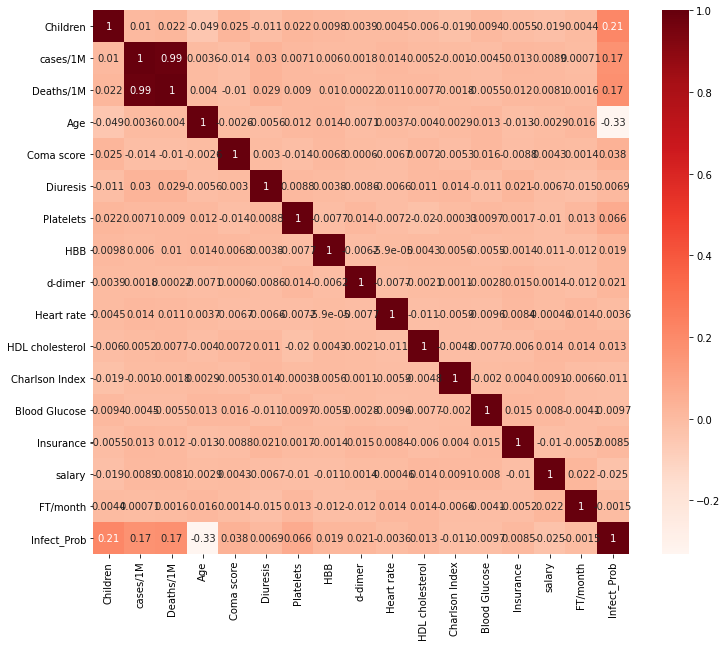

In [123]:
plt.figure(figsize=(12,10))
cor = train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [125]:
cor_target = abs(cor["Infect_Prob"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.05]
relevant_features

Children       0.210977
cases/1M       0.172871
Deaths/1M      0.174994
Age            0.331258
Platelets      0.066289
Infect_Prob    1.000000
Name: Infect_Prob, dtype: float64

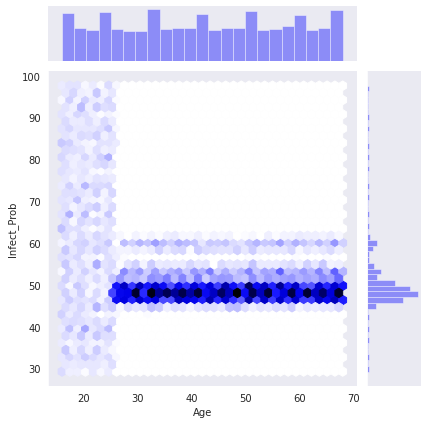

In [111]:
import seaborn as sns
with sns.axes_style("dark"):
    sns.jointplot(train.Age, train.Infect_Prob, kind="hex", color="blue");

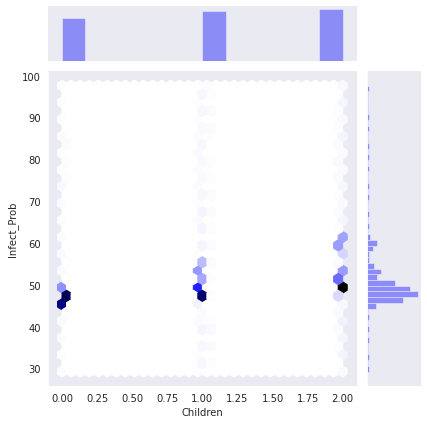

In [122]:
with sns.axes_style("dark"):
    sns.jointplot(train.Children, train.Infect_Prob, kind="hex", color="blue");

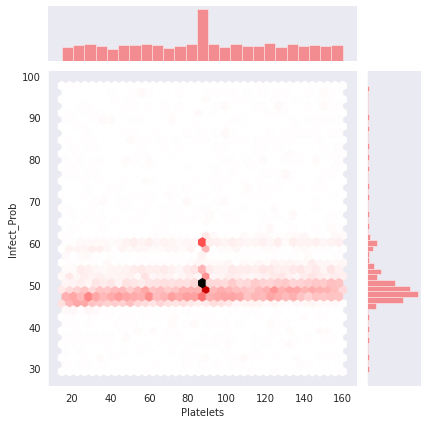

In [127]:
with sns.axes_style("dark"):
    sns.jointplot('Platelets', 'Infect_Prob', data = train ,kind="hex", color="red");

## Categorical Grids to Target

### **Age**

Below is given the comparison of Gender probablities based on 


1.   Occupation 
2.   Mode of Transport
3.   Comorbity
4.   cardiological pressure

Hence we Hypothize that Gender has nothing correlation with the probability and is roughly equal for all genders



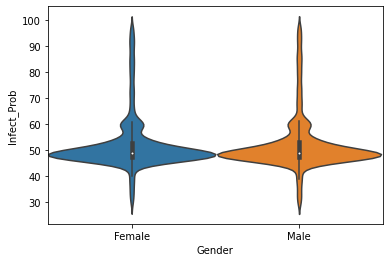

In [134]:
sns.violinplot(x='Gender', y='Infect_Prob', data=train , width = 1 , height = 4)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


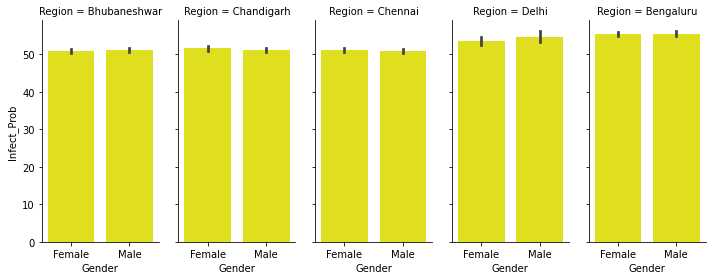

In [136]:
g = sns.FacetGrid(train, col="Region", height=4, aspect=.5)
g.map(sns.barplot, "Gender", 'Infect_Prob' , color = 'yellow');

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


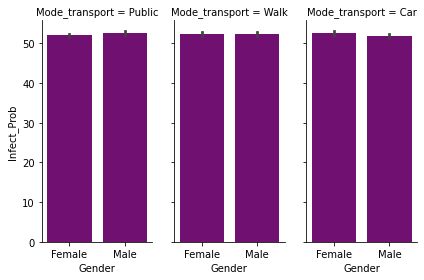

In [140]:
g = sns.FacetGrid(train, col="Mode_transport", height=4, aspect=.5)
g.map(sns.barplot, "Gender", 'Infect_Prob' , color = 'purple');

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


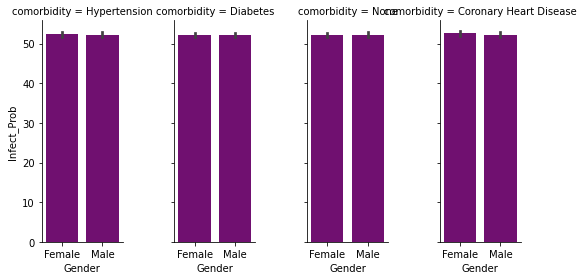

In [141]:
g = sns.FacetGrid(train, col="comorbidity", height=4, aspect=.5)
g.map(sns.barplot, "Gender", 'Infect_Prob' , color = 'purple');

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


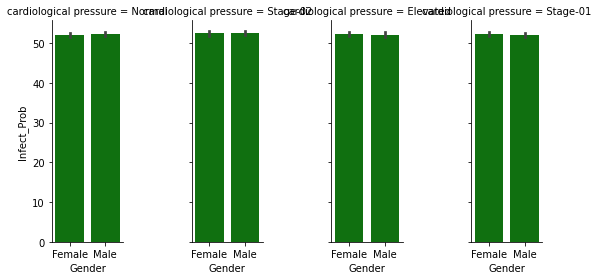

In [142]:
g = sns.FacetGrid(train, col="cardiological pressure", height=4, aspect=.5)
g.map(sns.barplot, "Gender", 'Infect_Prob' , color = 'green');

### **Occupation**

Below is given the comparison of Occupation  probablities based on 


1.   Mode of Transport
2.   Pulmonary score
3.   cardiological pressure

Hence we Hypothize that Occupation  has nothing correlation with the probability and is roughly equal for all Occupation 

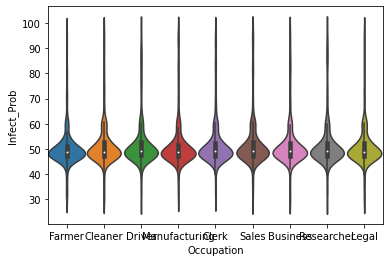

In [150]:
sns.violinplot(x='Occupation', y='Infect_Prob', data=train , width = 1 , height = 4 ,aspect=1.5)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


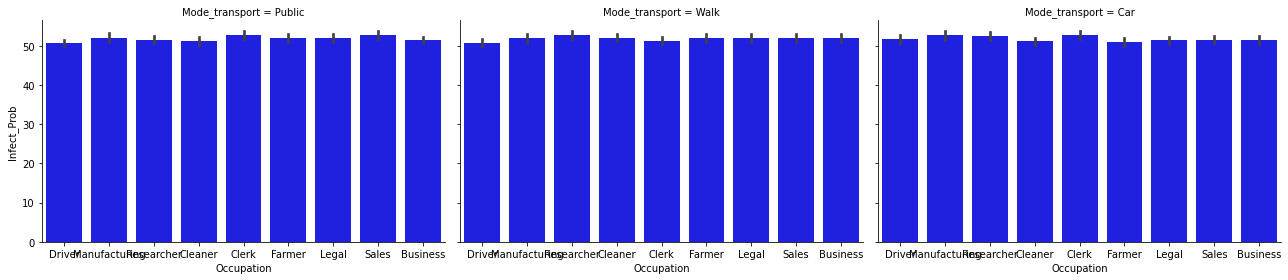

In [151]:
g = sns.FacetGrid(train, col="Mode_transport", height=4, aspect=1.5)
g.map(sns.barplot, "Occupation", 'Infect_Prob' , color = 'blue');

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


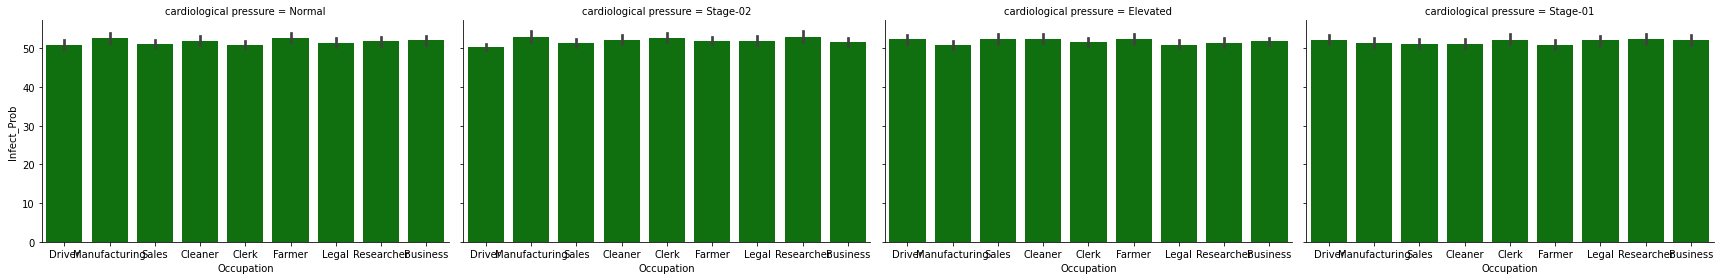

In [154]:
g = sns.FacetGrid(train, col="cardiological pressure", height=4, aspect=1.5)
g.map(sns.barplot, "Occupation", 'Infect_Prob' , color = 'green');

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


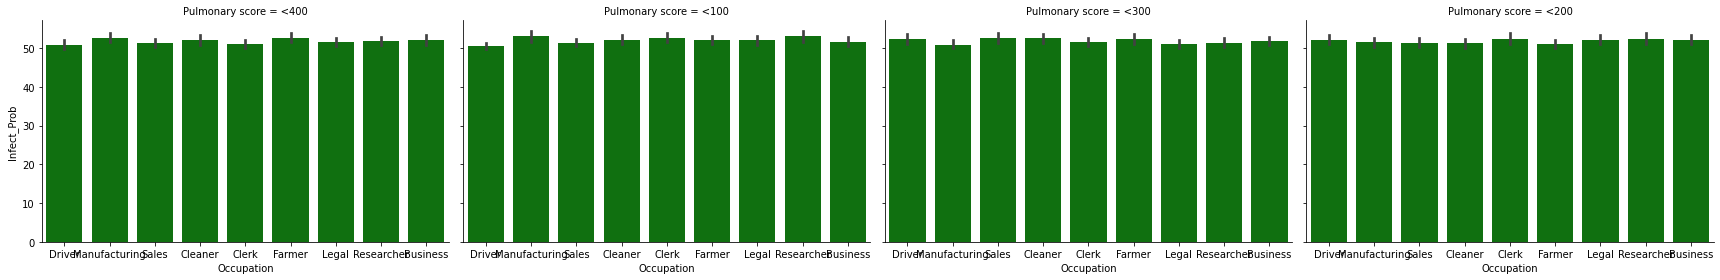

In [155]:
g = sns.FacetGrid(train, col="Pulmonary score", height=4, aspect=1.5)
g.map(sns.barplot, "Occupation", 'Infect_Prob' , color = 'green');

# Machine Learning Algorithms



In [0]:
def ML():
  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(df,target, test_size=0.33, random_state=42)
  name = []
  mod = []
  rmsv = []
  from sklearn import linear_model
  reg = linear_model.Lasso(alpha=0.1)
  reg.fit(X_train,y_train)
  y_pred = reg.predict(X_test)
  from sklearn.metrics import mean_squared_error
  from math import sqrt
  rms = sqrt(mean_squared_error(y_test, y_pred))
  name.append("Lasso")
  mod.append(" NA ")
  rmsv.append(rms)
  from sklearn import linear_model
  rerg1 = linear_model.ElasticNet(alpha=0.1)
  rerg1.fit(X_train,y_train)
  y_pred = rerg1.predict(X_test)
  from sklearn.metrics import mean_squared_error
  from math import sqrt
  rms = sqrt(mean_squared_error(y_test, y_pred))
  name.append("Elastic Net")
  mod.append(" NA ")
  rmsv.append(rms)
  from sklearn import linear_model
  rerg1 = linear_model.Ridge(alpha=0.1)
  rerg1.fit(X_train,y_train)
  y_pred = rerg1.predict(X_test)
  from sklearn.metrics import mean_squared_error
  from math import sqrt
  ms = sqrt(mean_squared_error(y_test, y_pred))
  name.append("Ridge")
  mod.append(" NA ")
  rmsv.append(ms)
  from sklearn.tree import DecisionTreeRegressor
  from sklearn.ensemble import AdaBoostRegressor
  regr_1 = DecisionTreeRegressor(max_depth=5)
  regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=5),n_estimators=300)
  regr_1.fit(X_train, y_train)
  regr_2.fit(X_train, y_train)
  y_1 = regr_1.predict(X_test)
  y_2 = regr_2.predict(X_test)
  rms1 = sqrt(mean_squared_error(y_test, y_1))
  name.append("DecisionTree Regressor")
  mod.append(" NA ")
  rmsv.append(rms1)
  rms2 = sqrt(mean_squared_error(y_test, y_2))
  name.append("AdaBoost Regressor")
  mod.append(" NA ")
  rmsv.append(rms2)
  from sklearn.ensemble import GradientBoostingRegressor
  est = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0, loss='ls').fit(X_train, y_train)
  grb = sqrt(mean_squared_error(y_test, est.predict(X_test)) )
  name.append("GradientBoosting Regressor")
  mod.append(" NA ")
  rmsv.append(grb)
  import lightgbm as lgb
  n_estimators = 100
  n_iters = 5
  preds_buf = []
  err_buf = []
  lgb_train = lgb.Dataset(X_train, y_train)
  lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)
  params = {
      'boosting_type': 'gbdt',
      'objective': 'regression',
      'metric': {'l2', 'l1'},
      'num_leaves': 31,
      'learning_rate': 0.05,
      'feature_fraction': 0.9,
      'bagging_fraction': 0.8,
      'bagging_freq': 5,
      'verbose': 0
  }
  gbm = lgb.train(params,
                  lgb_train,
                  num_boost_round=20,
                  valid_sets=lgb_eval, verbose_eval = False )
  y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
  name.append("LGB Regressor")
  mod.append(" NA ")
  rmsv.append(mean_squared_error(y_test, y_pred) ** 0.5)
  from catboost import CatBoostRegressor
  modelc = CatBoostRegressor()
  modelc.fit(X_train, y_train)
  y_pred = modelc.predict(X_test)
  from sklearn.metrics import mean_squared_error
  from math import sqrt
  rms = sqrt(mean_squared_error(y_test, y_pred))
  name.append("CAT Boost Regressor")
  mod.append(" NA ")
  rmsv.append(rms)
  from sklearn.model_selection import GridSearchCV
    
  model = CatBoostRegressor()
  parameters = {'depth'         : [6,8,10],
                    'learning_rate' : [0.01, 0.05, 0.1],
                    'iterations'    : [30, 50, 100]
                  }
  grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 2, n_jobs=-1)
  grid.fit(X_train, y_train)
  from catboost import CatBoostRegressor
  modelc = CatBoostRegressor(depth = grid.best_params_.get('depth') , iterations = grid.best_params_.get('iterations') , learning_rate = grid.best_params_.get('learning_rate'))
  modelc.fit(X_train, y_train)
  print(modelc)
  y_pred = modelc.predict(X_test)
  from sklearn.metrics import mean_squared_error
  from math import sqrt
  rms = sqrt(mean_squared_error(y_test, y_pred))
  name.append("CAT Boost Regressor Improved")
  mod.append(str(grid.best_params_))
  rmsv.append(rms)
  from xgboost.sklearn import XGBRegressor
  model = XGBRegressor(max_depth=9,min_child_weight = 1)
  model.fit(X_train, y_train)
  #print(model)
  y_pred = model.predict(X_test)
  from sklearn.metrics import mean_squared_error
  from math import sqrt
  rms = sqrt(mean_squared_error(y_test, y_pred))
  name.append("XGB Boost Regressor")
  mod.append(" NA ")
  rmsv.append(rms)
  from sklearn.model_selection import GridSearchCV   #Perforing grid search
  param_grid = {
  'max_depth':range(3,10,2),
  'min_child_weight':range(1,6,2)
  }
  logreg_cv = GridSearchCV(model, param_grid, cv = 5) 
  logreg_cv.fit(X_train, y_train,eval_metric='rmse')
  from xgboost.sklearn import XGBRegressor
  model = XGBRegressor(max_depth=logreg_cv.best_params_.get('max_depth'),min_child_weight = logreg_cv.best_params_.get('min_child_weight'))
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  from sklearn.metrics import mean_squared_error
  from math import sqrt
  rms = sqrt(mean_squared_error(y_test, y_pred))
  name.append("XGB Boost Regressor Improved")
  mod.append(str(logreg_cv.best_params_))
  rmsv.append(rms)
  dicto = {
      'Algorithm Name ':name ,
      'Algorithmic Modification ':mod,
      'Root Mean Square Value ': rmsv
  }
  dfObj = pd.DataFrame(dicto) 
  return dfObj

In [172]:
!pip install lightgbm
!pip install catboost

## **Without Analytical Changes**

In [261]:
df = train
df = df.drop('Name',axis =1)
target = df.Infect_Prob
df = df.drop('Infect_Prob',axis =1)
df.head(5)

,Region,Gender,Designation,Married,Children,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,Age,Coma score,Pulmonary score,cardiological pressure,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month
0,Bhubaneshwar,Female,Mrs,YES,1.0,Farmer,Public,2,0,Hypertension,68,8,<400,Normal,441.000000,154.0,93.0,233.0,82.0,58.0,27,7,3600000.0,1300000,2.0
1,Bhubaneshwar,Female,Mrs,YES,2.0,Farmer,Walk,2,0,Diabetes,64,15,<100,Stage-02,278.806261,121.0,56.0,328.0,89.0,68.0,5,6,1600000.0,400000,1.0
2,Bhubaneshwar,Female,Mrs,NO,1.0,Cleaner,Public,2,0,None,19,13,<300,Elevated,416.000000,124.0,137.0,213.0,77.0,43.0,40,6,3400000.0,900000,1.0
3,Bhubaneshwar,Female,Mrs,YES,1.0,Driver,Car,2,0,Coronary Heart Disease,33,9,<200,Stage-01,410.000000,98.0,167.0,275.0,64.0,60.0,27,7,700000.0,2300000,1.0
4,Bhubaneshwar,Female,Mrs,NO,2.0,Manufacturing,Car,2,0,Diabetes,23,7,<400,Normal,390.000000,21.0,153.0,331.0,71.0,64.0,32,7,3200000.0,1100000,1.0


In [263]:
categorical_variables.remove('Name')
df = pd.get_dummies(df, prefix_sep="__",columns=categorical_variables)
df.columns = df.columns.str.replace('<','')
df.head(5)

,Children,cases/1M,Deaths/1M,Age,Coma score,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Region__Bengaluru,Region__Bhubaneshwar,Region__Chandigarh,Region__Chennai,Region__Delhi,Gender__Female,Gender__Male,Designation__Mr,Designation__Mrs,Married__NO,Married__YES,Occupation__Business,Occupation__Cleaner,Occupation__Clerk,Occupation__Driver,Occupation__Farmer,Occupation__Legal,Occupation__Manufacturing,Occupation__Researcher,Occupation__Sales,Mode_transport__Car,Mode_transport__Public,Mode_transport__Walk,comorbidity__Coronary Heart Disease,comorbidity__Diabetes,comorbidity__Hypertension,comorbidity__None,Pulmonary score__100,Pulmonary score__200,Pulmonary score__300,Pulmonary score__400,cardiological pressure__Elevated,cardiological pressure__Normal,cardiological pressure__Stage-01,cardiological pressure__Stage-02
0,1.0,2,0,68,8,441.000000,154.0,93.0,233.0,82.0,58.0,27,7,3600000.0,1300000,2.0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0
1,2.0,2,0,64,15,278.806261,121.0,56.0,328.0,89.0,68.0,5,6,1600000.0,400000,1.0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1
2,1.0,2,0,19,13,416.000000,124.0,137.0,213.0,77.0,43.0,40,6,3400000.0,900000,1.0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0
3,1.0,2,0,33,9,410.000000,98.0,167.0,275.0,64.0,60.0,27,7,700000.0,2300000,1.0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,2.0,2,0,23,7,390.000000,21.0,153.0,331.0,71.0,64.0,32,7,3200000.0,1100000,1.0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0


In [265]:
df.

Index(['Children', 'cases/1M', 'Deaths/1M', 'Age', 'Coma score', 'Diuresis',
       'Platelets', 'HBB', 'd-dimer', 'Heart rate', 'HDL cholesterol',
       'Charlson Index', 'Blood Glucose', 'Insurance', 'salary', 'FT/month',
       'Region__Bengaluru', 'Region__Bhubaneshwar', 'Region__Chandigarh',
       'Region__Chennai', 'Region__Delhi', 'Gender__Female', 'Gender__Male',
       'Designation__Mr', 'Designation__Mrs', 'Married__NO', 'Married__YES',
       'Occupation__Business', 'Occupation__Cleaner', 'Occupation__Clerk',
       'Occupation__Driver', 'Occupation__Farmer', 'Occupation__Legal',
       'Occupation__Manufacturing', 'Occupation__Researcher',
       'Occupation__Sales', 'Mode_transport__Car', 'Mode_transport__Public',
       'Mode_transport__Walk', 'comorbidity__Coronary Heart Disease',
       'comorbidity__Diabetes', 'comorbidity__Hypertension',
       'comorbidity__None', 'Pulmonary score__100', 'Pulmonary score__200',
       'Pulmonary score__300', 'Pulmonary score__400',

In [0]:
dfans = ML()

In [267]:
dfans

,Algorithm Name,Algorithmic Modification,Root Mean Square Value
0,Lasso,NA,8.932825
1,Elastic Net,NA,8.964172
2,Ridge,NA,8.928631
3,DecisionTree Regressor,NA,8.863736
4,AdaBoost Regressor,NA,8.788214
5,GradientBoosting Regressor,NA,8.829472
6,LGB Regressor,NA,8.935110
7,CAT Boost Regressor,NA,9.157653
8,CAT Boost Regressor Improved,"{'depth': 8, 'iterations': 100, 'learning_rate...",8.663731
9,XGB Boost Regressor,NA,9.185572


In [268]:
dfans.sort_values(by=['Root Mean Square Value '])

,Algorithm Name,Algorithmic Modification,Root Mean Square Value
8,CAT Boost Regressor Improved,"{'depth': 8, 'iterations': 100, 'learning_rate...",8.663731
10,XGB Boost Regressor Improved,"{'max_depth': 3, 'min_child_weight': 1}",8.739016
4,AdaBoost Regressor,NA,8.788214
5,GradientBoosting Regressor,NA,8.829472
3,DecisionTree Regressor,NA,8.863736
2,Ridge,NA,8.928631
0,Lasso,NA,8.932825
6,LGB Regressor,NA,8.935110
1,Elastic Net,NA,8.964172
7,CAT Boost Regressor,NA,9.157653


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 <a list of 11 Text major ticklabel objects>)

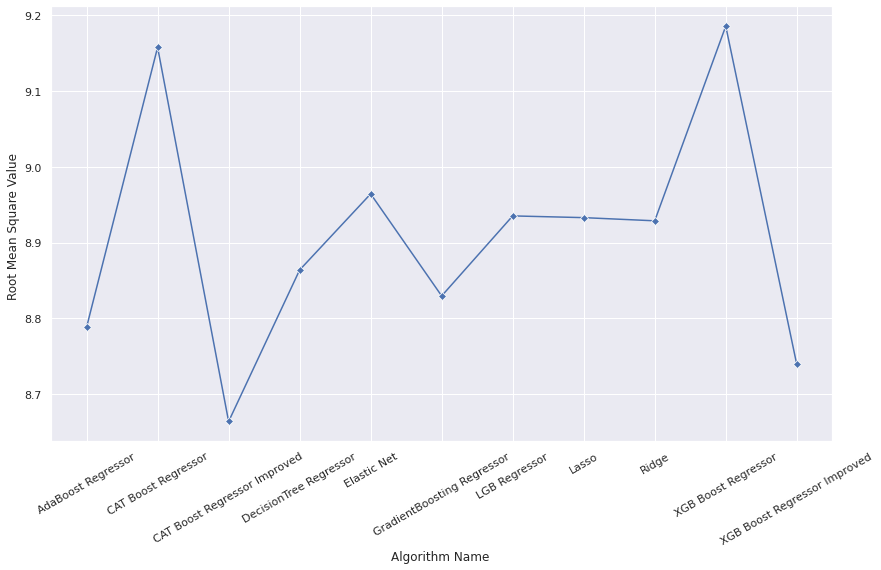

In [310]:
plt.figure(figsize=(14,8))
ax = sns.lineplot(x="Algorithm Name ", y="Root Mean Square Value ", data=dfans ,marker='D' )
plt.xticks(rotation=30)

## **With Analytical Changes**

In [160]:
df = train
df =  df.drop('Gender',axis =1)
df = df.drop('Occupation',axis = 1)
df = df.drop('Mode_transport',axis =1)
df = df.drop('Designation',axis =1)
df = df.drop('Name',axis =1)
df = df.drop('Married',axis =1)
target = df.Infect_Prob
df = df.drop('Infect_Prob',axis =1)
df.head(5)

,Region,Children,cases/1M,Deaths/1M,comorbidity,Age,Coma score,Pulmonary score,cardiological pressure,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month
0,Bhubaneshwar,1.0,2,0,Hypertension,68,8,<400,Normal,441.000000,154.0,93.0,233.0,82.0,58.0,27,7,3600000.0,1300000,2.0
1,Bhubaneshwar,2.0,2,0,Diabetes,64,15,<100,Stage-02,278.806261,121.0,56.0,328.0,89.0,68.0,5,6,1600000.0,400000,1.0
2,Bhubaneshwar,1.0,2,0,None,19,13,<300,Elevated,416.000000,124.0,137.0,213.0,77.0,43.0,40,6,3400000.0,900000,1.0
3,Bhubaneshwar,1.0,2,0,Coronary Heart Disease,33,9,<200,Stage-01,410.000000,98.0,167.0,275.0,64.0,60.0,27,7,700000.0,2300000,1.0
4,Bhubaneshwar,2.0,2,0,Diabetes,23,7,<400,Normal,390.000000,21.0,153.0,331.0,71.0,64.0,32,7,3200000.0,1100000,1.0


In [0]:
categorical_variables.remove('Gender')
categorical_variables.remove('Name')
categorical_variables.remove('Designation')
categorical_variables.remove('Occupation')
categorical_variables.remove('Mode_transport')
categorical_variables.remove('Married')

In [0]:
df = pd.get_dummies(df, prefix_sep="__",columns=categorical_variables)

In [0]:
df.columns = df.columns.str.replace('<','')

In [163]:
df.head(5)

,Children,cases/1M,Deaths/1M,Age,Coma score,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Region__Bengaluru,Region__Bhubaneshwar,Region__Chandigarh,Region__Chennai,Region__Delhi,comorbidity__Coronary Heart Disease,comorbidity__Diabetes,comorbidity__Hypertension,comorbidity__None,Pulmonary score__<100,Pulmonary score__<200,Pulmonary score__<300,Pulmonary score__<400,cardiological pressure__Elevated,cardiological pressure__Normal,cardiological pressure__Stage-01,cardiological pressure__Stage-02
0,1.0,2,0,68,8,441.000000,154.0,93.0,233.0,82.0,58.0,27,7,3600000.0,1300000,2.0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
1,2.0,2,0,64,15,278.806261,121.0,56.0,328.0,89.0,68.0,5,6,1600000.0,400000,1.0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
2,1.0,2,0,19,13,416.000000,124.0,137.0,213.0,77.0,43.0,40,6,3400000.0,900000,1.0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0
3,1.0,2,0,33,9,410.000000,98.0,167.0,275.0,64.0,60.0,27,7,700000.0,2300000,1.0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,2.0,2,0,23,7,390.000000,21.0,153.0,331.0,71.0,64.0,32,7,3200000.0,1100000,1.0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0


In [0]:
dfans = ML()

In [252]:
dfans

,Algorithm Name,Algorithmic Modification,Root Mean Square Value
0,Lasso,NA,9.537891
1,Elastic Net,NA,9.537742
2,Ridge,NA,9.537786
3,DecisionTree Regressor,NA,8.799612
4,AdaBoost Regressor,NA,9.377848
5,GradientBoosting Regressor,NA,8.832365
6,LGB Regressor,NA,8.945903
7,CAT Boost Regressor,NA,9.161846
8,CAT Boost Regressor Improved,"{'depth': 8, 'iterations': 30, 'learning_rate'...",8.685764
9,XGB Boost Regressor,NA,9.118070


In [251]:
dfans.sort_values(by=['Root Mean Square Value '])

,Algorithm Name,Algorithmic Modification,Root Mean Square Value
8,CAT Boost Regressor Improved,"{'depth': 8, 'iterations': 30, 'learning_rate'...",8.685764
10,XGB Boost Regressor Improved,"{'max_depth': 3, 'min_child_weight': 5}",8.773010
3,DecisionTree Regressor,NA,8.799612
5,GradientBoosting Regressor,NA,8.832365
6,LGB Regressor,NA,8.945903
9,XGB Boost Regressor,NA,9.118070
7,CAT Boost Regressor,NA,9.161846
4,AdaBoost Regressor,NA,9.377848
1,Elastic Net,NA,9.537742
2,Ridge,NA,9.537786
